In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from patsy import dmatrices
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report


import pickle
import joblib



In [2]:
# read the csv file using pandas
df= pd.read_csv('support_vector_machine_updated.csv')

In [4]:
df.head()

,GS,G,Assist_Pct,Usage_Pct,DRtg,Rising_Star
0,0.0,22.000000,3.8,17.6,106,0
1,1.0,50.000000,23.9,22.7,109,0
2,82.0,82.000000,25.6,25.7,112,0
3,39.0,68.333333,10.5,20.1,111,0
4,0.0,32.000000,10.6,16.4,106,0


In [5]:
# convert the array values
array = df.values

In [6]:
# assign to the dependent and independent variables
X= array[:,0:5]
Y= array[:,5]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
# train and test the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [9]:
# before standardising
X_train

array([[  1.        ,  43.        ,   5.1       ,  19.9       ,
        108.        ],
       [  8.33333333,  44.        ,   8.5       ,  14.1       ,
        110.        ],
       [  2.        ,  42.        ,  19.9       ,  24.7       ,
        112.        ],
       ...,
       [  6.        ,  56.        ,   7.2       ,  14.        ,
        102.        ],
       [  0.        ,   2.        ,  18.8       ,  12.6       ,
        117.        ],
       [  4.        ,  50.66666667,   3.9       ,  18.1       ,
        108.        ]])

In [10]:
# Standardise the variables in training
X_train = scaler.fit_transform(X_train)


In [11]:
# after standardising
X_train

array([[0.01219512, 0.51851852, 0.08900524, 0.45330296, 0.52777778],
       [0.10162602, 0.5308642 , 0.14834206, 0.32118451, 0.58333333],
       [0.02439024, 0.50617284, 0.34729494, 0.56264237, 0.63888889],
       ...,
       [0.07317073, 0.67901235, 0.12565445, 0.31890661, 0.36111111],
       [0.        , 0.01234568, 0.32809773, 0.28701595, 0.77777778],
       [0.04878049, 0.61316872, 0.06806283, 0.41230068, 0.52777778]])

In [12]:
# support vector machines
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import svm

# create the classifier
svm_clf= svm.SVC(kernel = 'linear')
svm_clf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
# predict the output on test data
predictions = svm_clf.predict(X_test)
predictions

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [14]:
# evaluating the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

#accuracy
print("Accuracy: ",metrics.accuracy_score(Y_test,predictions))

#precision
print("Precision: ",metrics.precision_score(Y_test,predictions))

# recall
print("Recall: ",metrics.recall_score(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("Classification Report")
print(classification_report(Y_test, predictions))




Accuracy:  0.9632352941176471
Precision:  0.6521739130434783
Recall:  0.8823529411764706
Confusion Matrix
[[247   8]
 [  2  15]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       255
         1.0       0.65      0.88      0.75        17

    accuracy                           0.96       272
   macro avg       0.82      0.93      0.87       272
weighted avg       0.97      0.96      0.97       272



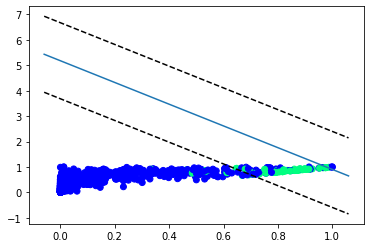

In [15]:
# plot the hyperplane
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap='winter');
axis= plt.gca()
xlim= axis.get_xlim()
w= svm_clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0],xlim[1])

yy=a* xx-svm_clf.intercept_[0] / w[1]
plt.plot(xx,yy) 

yy = a* xx-(svm_clf.intercept_[0] - 1)/w[1]
plt.plot(xx,yy,'k--')

yy = a* xx -(svm_clf.intercept_[0] + 1)/w[1]
plt.plot(xx,yy,'k--')

In [16]:
#Cross validation for checking the model's metrics

kfold= model_selection.KFold(n_splits=10,random_state=None)
model_kfold =svm_clf
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 96.51%


In [18]:
# save the model in pickle
filename ='finalised_pickle_SVM_model.sav' 
pickle.dump(svm_clf,open(filename,'wb'))

In [19]:
# load the model from pickle
loaded_model = pickle.load(open(filename,'rb'))

In [ ]:
################################### Job Lib #######################################################################

In [21]:
# save the model to a disk
filename = 'finalized_SVM_model_joblib_1.sav'

In [24]:
#dump the model in joblib
joblib.dump(svm_clf,filename)

['finalized_SVM_model_joblib_1.sav']

In [25]:
# unload the model from joblib
joblib_model = joblib.load(filename)